# 소셜게임의 이용자 탈퇴 이유 분석
>퍼즐컬렉션 서비스를 시작한지 1년 3개월이 지났습니다.</br>
서비스 직후에는 사전등록자를 중심으로 유저수가 크게 증가하였고, 몇 주 후에는 심각한 버그 때문에 유저들이 탈퇴하다가, 1개월 후에는 광고 효과로 다시 유저수가 증가하였고, 그 이후에는 그 광고를 보고 가입했던 유저들이 조금씩 떠나는 등 유저수가 단기적으로는 오르락내리락하면서 월 단위로는 반년 정도 계속해서 상승하였습니다.</br>
그 후 8개월 동안은 유저수가 정점을 찍은 상태로 유지되었습니다.

>그런데 이달 들어 퍼즐컬렉션 유저수가 크게 줄어들었습니다. </br>
지금껏 회사를 대표하는 히트 게임이었던 만큼 경영진을 중심으로 유저수의 감소를 큰 과제로 여겼습니다.</br>
광고 담당자 : "광고는 지난달과 비교해서 질이나 양 모두 전혀 변한점이 없었습니다." </br>
게임기획 담당자 : "퍼즐컬렉션에서 달마다 개최하는 이벤트도 큰 차이가 없었습니다."</br>
결국 소셜게임사업 본부장으로부터 "유저수가 감소하는 원인을 조사해서 무슨 조치든 취하시오."라는 업무지시가 데이터 분석담당부서로 떨어졌습니다.

## 현실의 모습 / 이상적인 모습
* 현실의 모습 : 지난달과 비교해서 이달 들어 유저수가 줄었다.
* 이상적인 모습 : 지난달과 같은 수준으로 유저수를 회복하는 것

## 문제 발견
* 문제
  - 지난달과 비교해서 이달 들어 유저수가 줄었다. (사실)
* 가설
  1. 광고에 문제가 있어서 신규 유저수보다 탈퇴 유저수가 더 많았다. (가설)
  2. 매월 테마를 바꿔서 개최하던 게임의 이벤트가 식상해져서 그만둔 유저가 많았다. (가설)
  3. 성별 혹은 연령 등 특정 유저층에서 탈퇴한 유저가 많았다. (가설)
* 타 부서들과 질의응답 결과
  - 광고는 지난달과 비교해 거의 같은 수준이었으며 신규 유저수도 거의 같은 수준이었다. (가설 1 기각)
  - 이벤트 내용도 지난달과 거의 바뀌지 않았다. (가설 2 기각)

>성별 혹은 연령 등 특정 유저층에서 탈퇴한 유저가 많았다. 라는 가설 3 을 분석 테마로 선정</br>
- 일반적으로 유저층을 분류하는 기준에는 성별, 연령 등이 있고, 먼저 이렇게 분류해서 유저수가 줄어든 층이 있는지 확인할 수 있다.</br>
- 각 유저층의 유저수를 지난달과 비교해서 줄어든 유저층이 있는지 데이터로 확인하고, 만일 실제로 있다면 어떻게 유저수를 회복할지 생각해보자.

## 데이터 수집과 가공
### 데이터 분석 스토리 정리
* 문제
  - 지난달과 비교해서 유저수가 줄어들었다. (사실)
  - 어떤 특정한 유저층에 문제가 생겼을 것이다. (가설)
* 해결책
  - 숫자가 줄어든 유저층에 적합한 대책을 세워서 지난달과 같은 수준으로 유저수를 회복한다.
* 최종 스토리 정리
  - 퍼즐컬렉션의 유저수가 지난달보다 줄어들었다. (사실)
  - 어딘가 숫자가 줄어든 세그먼트가 있을 것이다. (가설)
  - 그 세그먼트에 적합한 대책을 세워서 유저수를 지난달과 같은 수준으로 회복한다. (해결책)
* 분석에 필요한 데이터 검토
  - DAU(Daily Active User) : 하루에 한 번 이상 게임을 이용한 유저 데이터
  - user_info : 유저의 속성정보 데이터

### 분석에 필요한 데이터 수집

In [3]:
#필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
#CSV 파일 읽어 들이기
dau = pd.read_csv('section4-dau.csv')
user_info = pd.read_csv('section4-user_info.csv')

In [4]:
dau.info()
# log_date : 로그인한 날
# app_name : 앱 이름
# user_id : 유저 ID
print("============================================")
print(dau)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170360 entries, 0 to 170359
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   log_date  170360 non-null  object
 1   app_name  170360 non-null  object
 2   user_id   170360 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.9+ MB
          log_date app_name  user_id
0       2013-08-01  game-01    33754
1       2013-08-01  game-01    28598
2       2013-08-01  game-01    30306
3       2013-08-01  game-01      117
4       2013-08-01  game-01     6605
...            ...      ...      ...
170355  2013-09-30  game-01    49329
170356  2013-09-30  game-01    49330
170357  2013-09-30  game-01    49331
170358  2013-09-30  game-01    48888
170359  2013-09-30  game-01    10155

[170360 rows x 3 columns]


In [6]:
user_info.info()
# install_date : 이용시작일
# app_name : 앱 이름
# user_id : 유저 ID
# gender : 성별(여성,남성)
# generation : 연령대(10,20,30,40,50)
# device_type : 단말기 종류(iOS,Android)
print("============================================")
print(user_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49526 entries, 0 to 49525
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   install_date  49526 non-null  object
 1   app_name      49526 non-null  object
 2   user_id       49526 non-null  int64 
 3   gender        49526 non-null  object
 4   generation    49526 non-null  int64 
 5   device_type   49526 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.3+ MB
      install_date app_name  user_id gender  generation device_type
0       2013-04-15  game-01        1      M          40         iOS
1       2013-04-15  game-01        2      M          10     Android
2       2013-04-15  game-01        3      F          40         iOS
3       2013-04-15  game-01        4      M          10     Android
4       2013-04-15  game-01        5      M          40         iOS
...            ...      ...      ...    ...         ...         ...
49521   2013-09-30  game-01   

### 데이터 가공(전처리)

In [15]:
# user_info 데이터에 dau 데이터 결합하기
user_info_dau = pd.merge(user_info, dau, on=['user_id', 'app_name'],how='left')
user_info_dau=user_info_dau[['user_id','app_name','log_date','install_date','gender','generation','device_type']]
user_info_dau

,user_id,app_name,log_date,install_date,gender,generation,device_type
0,1,game-01,2013-09-01,2013-04-15,M,40,iOS
1,1,game-01,2013-09-02,2013-04-15,M,40,iOS
2,1,game-01,2013-09-03,2013-04-15,M,40,iOS
3,1,game-01,2013-09-04,2013-04-15,M,40,iOS
4,1,game-01,2013-09-05,2013-04-15,M,40,iOS
...,...,...,...,...,...,...,...
194293,49522,game-01,2013-09-30,2013-09-30,F,20,iOS
194294,49523,game-01,2013-09-30,2013-09-30,F,20,iOS
194295,49524,game-01,2013-09-30,2013-09-30,F,30,iOS
194296,49525,game-01,2013-09-30,2013-09-30,F,20,iOS


### 데이터 분석
- 어떤 속성을 가진 유저층이 지난달에 비해 감소하였는지 그 세그먼트를 찾아내기 위해 크로스집계를 실시하고, 만일 원인으로 생각되는 속성이 발견되면 그것을 시각화하겠다.

In [19]:
# 세그먼트 분석(성별로 집계)
# 지난달과 이번달을 비교하기 위해 월 처리
user_info_dau['log_date']=pd.to_datetime(user_info_dau["log_date"])
user_info_dau['log_date']=user_info_dau['log_date'].dt.strftime('%Y-%m')
user_info_dau['install_date']=pd.to_datetime(user_info_dau["install_date"])
user_info_dau['install_date']=user_info_dau['install_date'].dt.strftime('%Y-%m')

In [22]:
# 성별로 집계
by_gender = user_info_dau.groupby(['log_date','gender'])['gender'].count()
by_gender.unstack()

gender,F,M
log_date,,
2013-08,47343,46842
2013-09,38027,38148


In [23]:
#세그먼트 분석(연령대별로 집계)
by_generation = user_info_dau.groupby(['log_date','generation'])['generation'].count()
by_generation.unstack()

generation,10,20,30,40,50
log_date,,,,,
2013-08,18785,33671,28072,8828,4829
2013-09,15391,27229,22226,7494,3835


* 2013년 8월과 9월의 남녀를 비교해보면 전체적으로 숫자는 줄어들었지만 남녀의 구성비율은 거의 변화가 없으므로, 성별은 전체 이용자수 변화에 직접적인 영향이 크지 않음
* 연령대 또한 거의 비슷한 비율을 이루고 있고, 크게 줄어든 연령대는 찾아볼 수 없음.
> 그렇다면 특정 성별의 특정 연령대에서 이용률이 떨어졌을 가능성을 생각해보자.

In [33]:
#세그먼트 분석(성별 X 연령대) (크로스 집계)
by_gender_generation = user_info_dau.groupby(['log_date','gender','generation'])['gender'].count()
by_gender_generation.unstack()

generation         10     20     30    40    50
log_date gender                                
2013-08  F       9091  17181  14217  4597  2257
         M       9694  16490  13855  4231  2572
2013-09  F       7316  13616  11458  3856  1781
         M       8075  13613  10768  3638  2054

* 이번에도 역시 모든 세그먼트에서 전체적으로 숫자가 감소하였고 비율도 비슷해서, 크게 감소한 세그먼트를 발견할 수 없었음
>그렇다면 단말기 종류가 안드로이드인지 아이폰인지에 따라 차이가 있는지 확인해보자.

In [38]:
# 세그먼트 분석(단말기별로 집계)
by_devicetype = user_info_dau.groupby(['log_date','device_type'])['device_type'].count().unstack()
by_devicetype

device_type,Android,iOS
log_date,,
2013-08,46974,47211
2013-09,29647,46528


>iOS를 사용하는 유저수는 거의 줄어들지 않은 반면 Android를 사용하는 유저수는 크게 감소한 것을 확인할 수 있음 </br>
이 세그먼트 분류가 이번 사례의 문제를 해결할 수 있을것 같다.

* 그래프로 데이터를 시각화해보자.

<Axes: xlabel='log_date'>

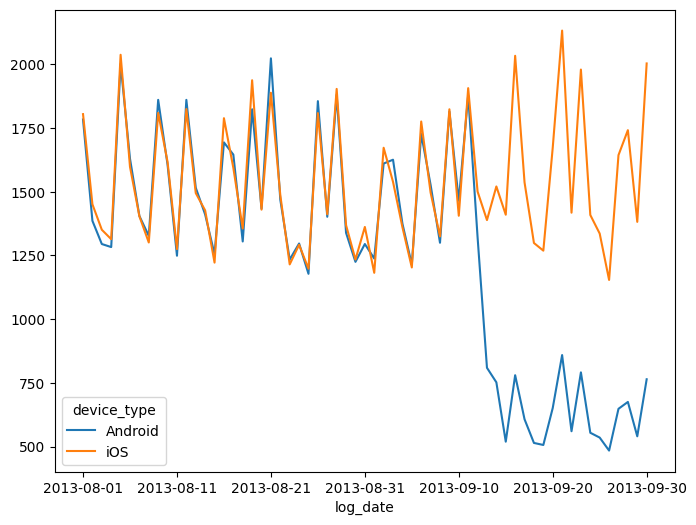

In [44]:
#세그먼트 분석 결과 시각화하기
import matplotlib.pyplot as plt
df = pd.merge(user_info,dau, on=['user_id', 'app_name'],how='left')
df = df.groupby(['log_date','device_type'])['device_type'].count().unstack()
df.plot(figsize=(8, 6), stacked=False)

>iOS와 Android 양쪽 모두 비슷한 유저수를 유지하다가 9월 두 번째 주부터 급격히 Androidㅇ 유저수가 줄어든 것을 알 수 있다.

## 데이터 분석 결과

#### 세웠던 가설
- 퍼즐컬렉션의 유저수가 지난달보다 줄어들었다. (사실)
- 어딘가 숫자가 줄어든 세그먼트가 있을 것이다. (가설)
- 그 세그먼트에 적합한 대책을 세워서 유저수를 지난달과 같은 수준으로 회복한다. (해결책)

#### 분석 후 얻어낸 것
- 퍼즐컬렉션의 유저수가 지난달보다 줄어들었다. (사실)
- Android 단말기를 이용하는 유저수가 현저히 줄어들었다. (사실)
- Android 단말기에서 게임에 문제가 있는지 찾아내고 해결하여 유저수를 지난달과 같은 수준으로 되돌린다.
  (데이터 분석으로 얻어낸 신빙성 높은 해결책)

## 액션
> 분석 결과를 바탕으로 게임개발부서에 확인해본 결과, 9월 12일에 Android용 게임의 버전업을 실시한 것을 알게되었음</br>
유저수가 줄어든 단말기 기종의 데이터를 뽑아봤더니 모두 구형 기종이라는 공통점을 발견할 수 있었음</br> 게임 버전업 후에 구형 Android단말기에서 로그인이 되지 않는 버그가 발생한 것이 드러났고, 시급히 이 버그를 고치기로 하였음.

## 정리
#### 크로스집계를 활용한 세그먼트 분석 진행
>지난달과 비교해서 유저수가 줄어든 것을 문제로 보고 그 원인을 찾아보았음</br>
데이터를 분석하기 전에 가급적 관계 부서에 정보를 캐묻고 사실을 파악하는 것은 필수지만, 이렇다 할 원인이 밝혀지지 않을 때도 있다는 것을 알게 되었음.</br> 이런 경우 탐색형 데이터 분석을 실시하고 검증할 때 시행착오가 여러 번 발생하기 때문에 지금 밝히고자 하는 문제가 무엇이고 그 가설을 어떻게 세웠었는지 항상 의식하면서 데이터를 주의 깊게 파고드는 것이 중요하다고 느낌.